# Automatic Detection of Hot-Rolled Steel Strips Surface Defects using CNN


In [8]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import load_img  # or utils.load_img in newer TF

In [9]:
train_dir = 'C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/Metal Surface Defects Data/train'
val_dir = 'C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/Metal Surface Defects Data/valid'
test_dir='C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/Metal Surface Defects Data/test'
print("Path: ",os.listdir("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/Metal Surface Defects Data"))
print("Train: ",os.listdir("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/Metal Surface Defects Data/train"))
print("Test: ",os.listdir("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/Metal Surface Defects Data/test"))
print("Validation: ",os.listdir("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/Metal Surface Defects Data/valid"))

Path:  ['test', 'train', 'valid']
Train:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Test:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Validation:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [10]:
print("Inclusion Defect")
print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

Inclusion Defect
Training Images: 276
Testing Images: 12
Validation Images: 12


In [11]:
# Rescaling all Images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training images are put in batches of 10
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Validation images are put in batches of 10
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.


Found 72 images belonging to 6 classes.


In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

c:\Users\gopeami\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.utils import model_to_dot

dot = model_to_dot(model, show_shapes=True, show_layer_names=True)
with open("model.dot", "w", encoding="utf-8") as f:
    f.write(dot.to_string())

In [16]:
import tensorflow as tf
import datetime

log_dir = "logs/graph/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
writer = tf.summary.create_file_writer(log_dir)

# Turn on tracing
tf.summary.trace_on(graph=True, profiler=False)

# Run a single forward pass with dummy data to build the graph
# Adjust the shape to your model's input shape
dummy = tf.random.uniform([1] + list(model.input_shape[1:]))
_ = model(dummy, training=False)

# Export the trace
with writer.as_default():
    tf.summary.trace_export(name="keras_model", step=0)

print("Graph logged to:", log_dir)


Graph logged to: logs/graph/20251017-173838


In [17]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20


c:\Users\gopeami\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/166 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.3587 - loss: 1.5959 - val_accuracy: 0.5417 - val_loss: 1.0172
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.5960 - loss: 1.1387 - val_accuracy: 0.7639 - val_loss: 0.7963
Epoch 3/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.7071 - loss: 0.8294 - val_accuracy: 0.8750 - val_loss: 0.4012
Epoch 4/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.7856 - loss: 0.6319 - val_accuracy: 0.9306 - val_loss: 0.2292
Epoch 5/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.8200 - loss: 0.5856 - val_accuracy: 0.8750 - val_loss: 0.2942
Epoch 6/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.8545 - loss: 0.4636 - val_accuracy: 0.8889 - val_loss: 0.3553
Epoch 7/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.8629 - loss: 0.4480 - val_accuracy: 0.8750 - val_loss: 0.2664
Epoch 8/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.8762 - loss: 0.4082 - val_accur

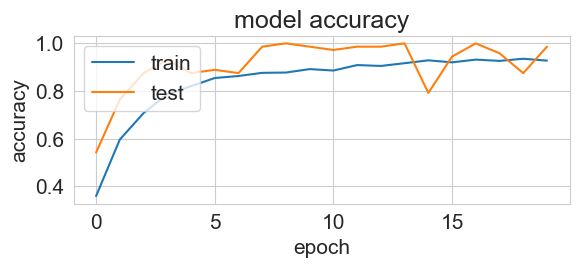

In [18]:
sns.set_style("whitegrid")
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

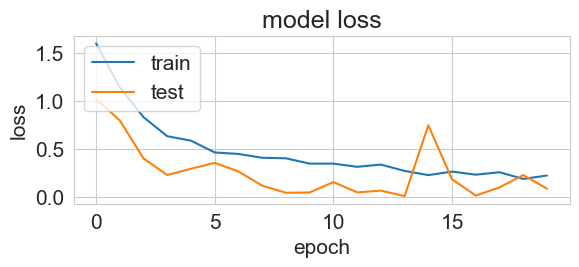

In [19]:
sns.set_style("whitegrid")
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [20]:
# Loading file names & their respective target labels into numpy array
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
x_test, y_test,target_labels = load_dataset(test_dir)
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [21]:
y_test = np_utils.to_categorical(y_test,no_of_classes)

NameError: name 'np_utils' is not defined

In [ ]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [ ]:
x_test = x_test.astype('float32')/255

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


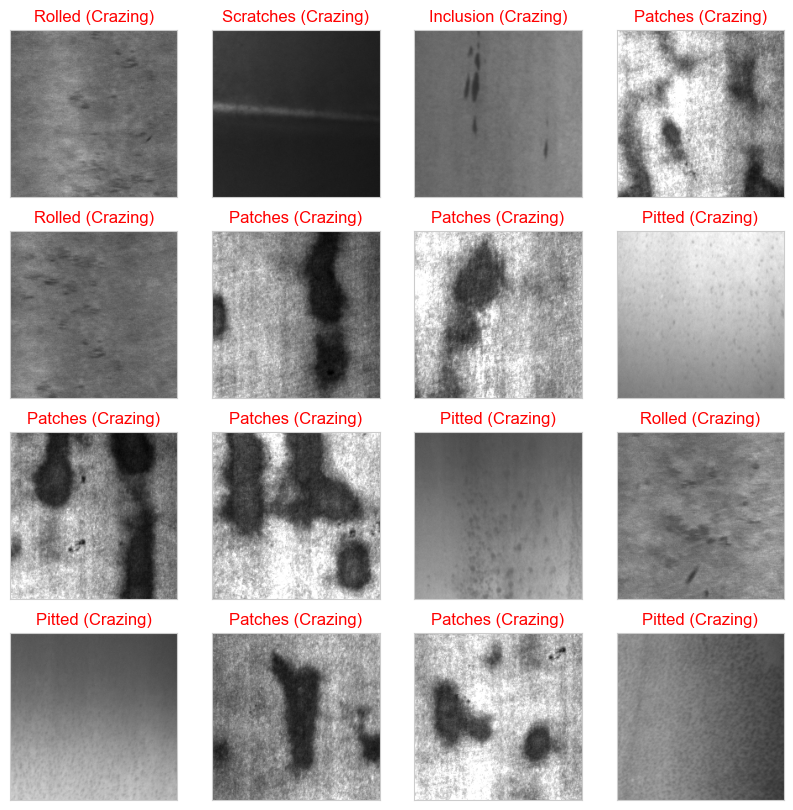

In [ ]:
# Plotting Random Sample of test images, their predicted labels, and ground truth
y_pred = model.predict(x_test)
fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# UNET Model - Pretrained Model from Pytorch

In [ ]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option("display.max_rows", 101)
import os
print(os.listdir("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/severstal-steel-defect-detection"))
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 15
import seaborn as sns
from collections import Counter
from PIL import Image
import math
import seaborn as sns
from collections import defaultdict
from pathlib import Path
import cv2
from tqdm import tqdm

['clear-mask-visualization-and-simple-eda.ipynb', 'outputs_smp', 'sample_submission.csv', 'severstal_smp_unet_fpn_pipeline.ipynb', 'severstal_unetpp_deeplab_lovasz_tversky.ipynb', 'severstal_yolov8_seg_pipeline.ipynb', 'Steel_defects_detection.ipynb', 'steel_defect_detection.ipynb', 'test_images', 'tpu_segmentation', 'train.csv', 'train_images', 'unet-starter-kernel-pytorch-lb-0-88.ipynb']


In [ ]:
train_df = pd.read_csv("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/severstal-steel-defect-detection/train.csv")
sample_df = pd.read_csv("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/severstal-steel-defect-detection/sample_submission.csv")

In [ ]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
sample_df.head()

,ImageId,EncodedPixels,ClassId
0,0000f269f.jpg,1 409600,0
1,000ccc2ac.jpg,1 409600,0
2,002451917.jpg,1 409600,0
3,003c5da97.jpg,1 409600,0
4,0042e163f.jpg,1 409600,0


In [ ]:
class_dict = defaultdict(int)

kind_class_dict = defaultdict(int)

no_defects_num = 0
defects_num = 0

for col in range(0, len(train_df), 4):
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError
        
    labels = train_df.iloc[col:col+4, 1]
    if labels.isna().all():
        no_defects_num += 1
    else:
        defects_num += 1
    
    kind_class_dict[sum(labels.isna().values == False)] += 1
        
    for idx, label in enumerate(labels.isna().values.tolist()):
        if label == False:
            class_dict[idx+1] += 1

ValueError: 

In [ ]:
print("the number of images with no defects: {}".format(no_defects_num))
print("the number of images with defects: {}".format(defects_num))

the number of images with no defects: 0
the number of images with defects: 0


defaultdict(int, {})

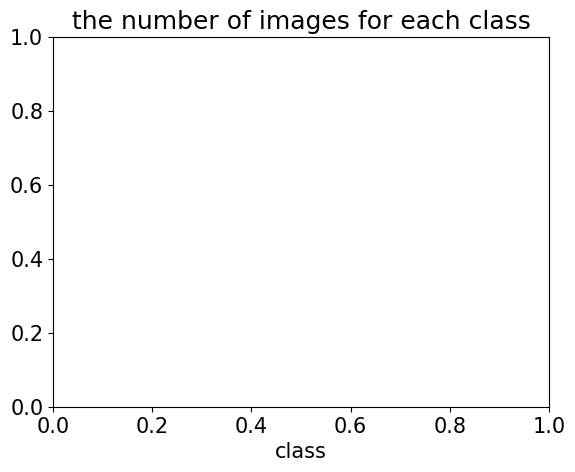

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=list(class_dict.keys()), y=list(class_dict.values()), ax=ax)
ax.set_title("the number of images for each class")
ax.set_xlabel("class")
class_dict

defaultdict(int, {1: 6239, 2: 425, 3: 2})

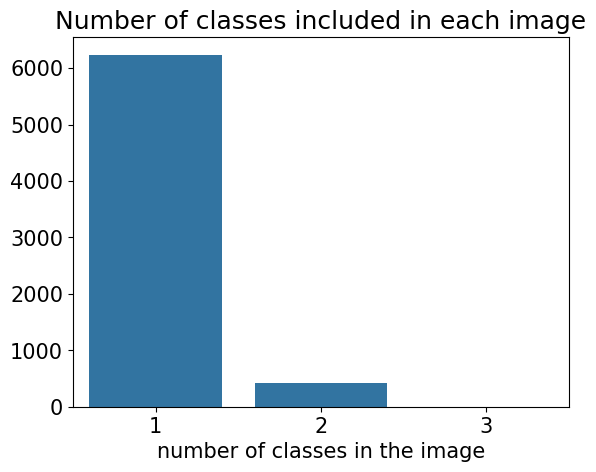

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=list(kind_class_dict.keys()), y=list(kind_class_dict.values()), ax=ax)
ax.set_title("Number of classes included in each image");
ax.set_xlabel("number of classes in the image")
kind_class_dict

In [ ]:
train_size_dict = defaultdict(int)
train_path = Path("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/severstal-steel-defect-detection/train_images/")

for img_name in train_path.iterdir():
    img = Image.open(img_name)
    train_size_dict[img.size] += 1

In [ ]:
train_size_dict

defaultdict(int, {(1600, 256): 12568})

In [ ]:
test_size_dict = defaultdict(int)
test_path = Path("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/severstal-steel-defect-detection/test_images/")

for img_name in test_path.iterdir():
    img = Image.open(img_name)
    test_size_dict[img.size] += 1

In [ ]:
test_size_dict

defaultdict(int, {(1600, 256): 5506})

In [ ]:
palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]

In [ ]:
def name_and_mask(start_idx):
    col = start_idx
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError

    labels = train_df.iloc[col:col+4, 1]
    mask = np.zeros((256, 1600, 4), dtype=np.uint8)

    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            mask_label = np.zeros(1600*256, dtype=np.uint8)
            label = label.split(" ")
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            for pos, le in zip(positions, length):
                mask_label[pos-1:pos+le-1] = 1
            mask[:, :, idx] = mask_label.reshape(256, 1600, order='F')
    return img_names[0], mask

In [ ]:
def show_mask_image(col):
    name, mask = name_and_mask(col)
    img = cv2.imread(str(train_path / name))
    fig, ax = plt.subplots(figsize=(15, 15))

    for ch in range(4):
        contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for i in range(0, len(contours)):
            cv2.polylines(img, contours[i], True, palet[ch], 2)
    ax.set_title(name)
    ax.imshow(img)
    plt.show()

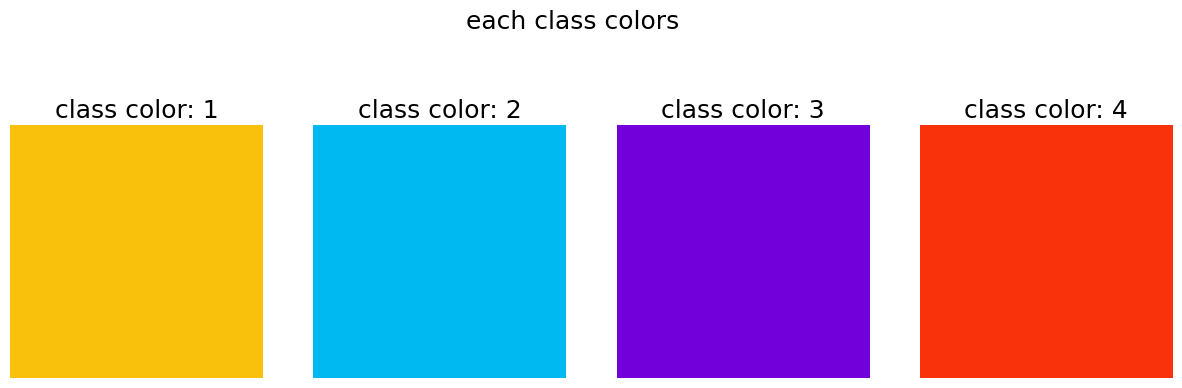

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((50, 50, 3), dtype=np.uint8) * palet[i])
    ax[i].set_title("class color: {}".format(i+1))
fig.suptitle("each class colors")

plt.show()

In [ ]:
idx_no_defect = []
idx_class_1 = []
idx_class_2 = []
idx_class_3 = []
idx_class_4 = []
idx_class_multi = []
idx_class_triple = []

for col in range(0, len(train_df), 4):
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError
    labels = train_df.iloc[col:col+4, 1]
    if labels.isna().all():
        idx_no_defect.append(col)
    elif (labels.isna() == [False, True, True, True]).all():
        idx_class_1.append(col)
    elif (labels.isna() == [True, False, True, True]).all():
        idx_class_2.append(col)
    elif (labels.isna() == [True, True, False, True]).all():
        idx_class_3.append(col)
    elif (labels.isna() == [True, True, True, False]).all():
        idx_class_4.append(col)
    elif labels.isna().sum() == 1:
        idx_class_triple.append(col)
    else:
        idx_class_multi.append(col)

ValueError: 

In [ ]:
for idx in idx_no_defect[:5]:
    show_mask_image(idx)

In [ ]:
for idx in idx_class_1[:5]:
    show_mask_image(idx)

In [ ]:
for idx in idx_class_2[:5]:
    show_mask_image(idx)

In [ ]:
for idx in idx_class_3[:5]:
    show_mask_image(idx)

In [ ]:
for idx in idx_class_4[:5]:
    show_mask_image(idx)

In [ ]:
for idx in idx_class_multi[:5]:
    show_mask_image(idx)

In [ ]:
for idx in idx_class_triple:
    show_mask_image(idx)

In [ ]:
for col in tqdm(range(0, len(train_df), 4)):
    name, mask = name_and_mask(col)
    if (mask.sum(axis=2) >= 2).any():
        show_mask_image(col)

# EDA Analysis

In [22]:
#load some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import pickle
import time
import cv2
from tqdm import tqdm
import functools

In [23]:
#change current directory to root folder
os.chdir('C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Steel Surface Defects Classification/severstal-steel-defect-detection')

In [24]:
#we are provided with 2 csv files and 2 folders
os.listdir()

['clear-mask-visualization-and-simple-eda.ipynb',
 'outputs_advanced',
 'outputs_smp',
 'sample_submission.csv',
 'severstal_smp_unet_fpn_pipeline.ipynb',
 'severstal_unetpp_deeplab_lovasz_tversky.ipynb',
 'severstal_yolov8_seg_pipeline.ipynb',
 'Steel_defects_detection.ipynb',
 'steel_defect_detection.ipynb',
 'test_images',
 'tpu_segmentation',
 'train.csv',
 'train_images',
 'unet-starter-kernel-pytorch-lb-0-88.ipynb']

In [25]:

#let us first examine train.csv file
train_df = pd.read_csv('train.csv')
print(train_df.shape)
train_df.head()

(7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [26]:

#How many images are present with atleast one defect type?
#Total types of defect?
train_images = os.listdir('train_images')
normal_image = list(set(train_images) - set(train_df['ImageId'].unique()))
print("Number of unique class id (defect type): ", train_df['ClassId'].unique().shape[0])
print("Total Train Samples: ", len(train_images))
print("Number of samples id with atleast one defect: ", train_df['ImageId'].unique().shape[0])
print("Number of samples with no defect: ", len(train_images) - train_df['ImageId'].unique().shape[0])

Number of unique class id (defect type):  4
Total Train Samples:  12568
Number of samples id with atleast one defect:  6666
Number of samples with no defect:  5902


In [27]:
def read_image(image, flag='IMREAD_UNCHANGED'):
    #return numpy array
    if flag == 'IMREAD_UNCHANGED':
        return cv2.imread(image, cv2.IMREAD_UNCHANGED)
    elif flag == 'IMREAD_GRAYSCALE':
        return cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    else:
        raise Exception("Please provide valid flag")

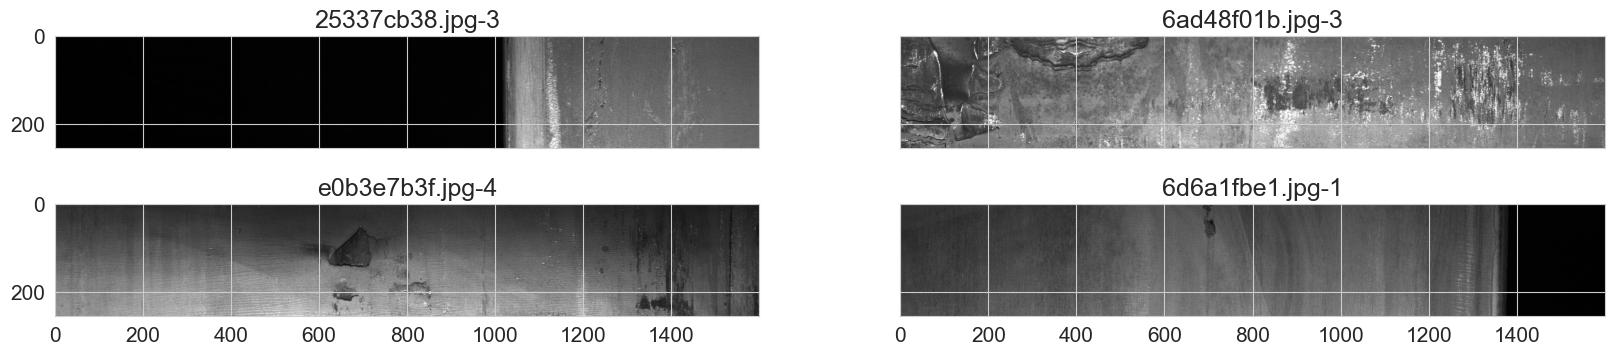

In [28]:
#let us visualize some images with atleast 1 defect
fig, axs = plt.subplots(2,2,figsize=(20,4), sharex=True,sharey=True)
for i in range(4):
    row_id = np.random.randint(0,train_df.shape[0])
    image_id, class_id = train_df['ImageId'].iloc[row_id], train_df['ClassId'].iloc[row_id]
    image_path = os.path.join('train_images', image_id)
    sample_image = read_image(image_path)
    axs[i//2][i%2].imshow(sample_image)
    axs[i//2][i%2].set_title(f'{image_id}-{class_id}')
plt.subplots_adjust()
plt.show()

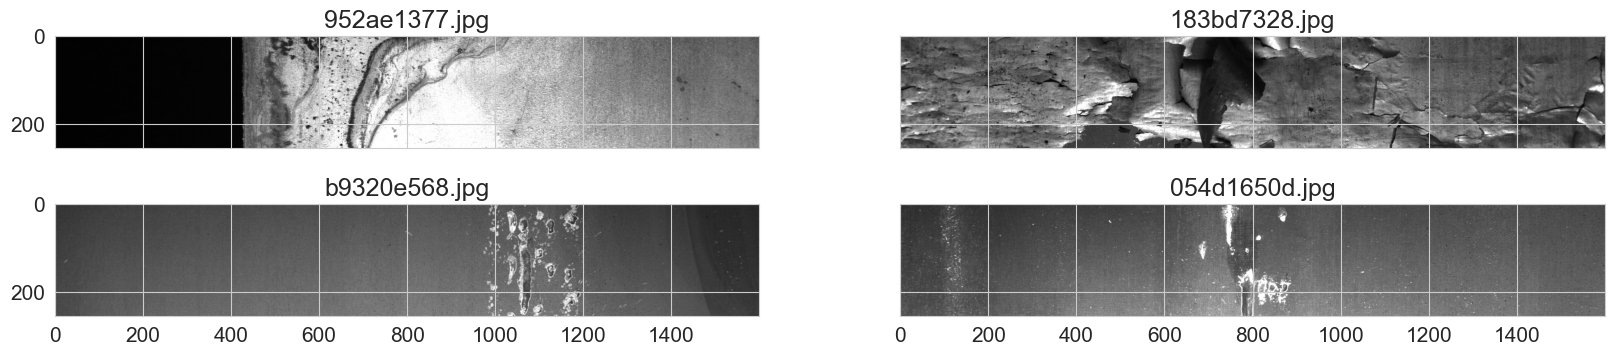

In [33]:
#lastly let us visualize some steel without any defect
fig, axs = plt.subplots(2,2,figsize=(20,4), sharex=True,sharey=True)
for i in range(4):
    row_id = np.random.randint(0,len(normal_image))
    image_id = normal_image[row_id]
    image_path = os.path.join('train_images', image_id)
    sample_image = read_image(image_path)
    axs[i//2][i%2].imshow(sample_image)
    axs[i//2][i%2].set_title(f'{image_id}')
plt.subplots_adjust()
plt.show()

In [34]:
#image width, height distribution
width_list, height_list = [], []
for image_id in tqdm(train_images):
    height, width, _ = read_image(os.path.join('train_images', image_id)).shape
    width_list.append(width)
    height_list.append(height)

for i in range(0, 101, 25):
    print("Image Width {i}th percentile: ", np.percentile(width_list, q=i))
print("="*40)
for i in range(0, 101, 25):
    print("Image Height {i}th percentile: ", np.percentile(height_list, q=i))
     

100%|██████████| 12568/12568 [01:19<00:00, 158.45it/s]

Image Width {i}th percentile:  1600.0
Image Width {i}th percentile:  1600.0
Image Width {i}th percentile:  1600.0
Image Width {i}th percentile:  1600.0
Image Width {i}th percentile:  1600.0
Image Height {i}th percentile:  256.0
Image Height {i}th percentile:  256.0
Image Height {i}th percentile:  256.0
Image Height {i}th percentile:  256.0
Image Height {i}th percentile:  256.0


In [35]:
def transform(encoded_pixel, width=1600, height=256, fill_value=1):
    "return mask of image size (height*width)"
    encoded_pixel_list = list(map(lambda x: int(x), encoded_pixel.split(' ')))
    n = len(encoded_pixel_list)
    encoded_pixel_list = [(encoded_pixel_list[i], encoded_pixel_list[i+1]) for i in range(0, n, 2)]
    #create a flat array of size width*height
    mask = np.zeros(height*width)
    for start, offset in encoded_pixel_list:
        mask[start-1:start+offset-1] = fill_value #minus 1 is because encoded pixel starts from 1 and not 0
    #transpose operation is necessary to match pixel number format
    mask = mask.reshape(width, height)
    return mask.T

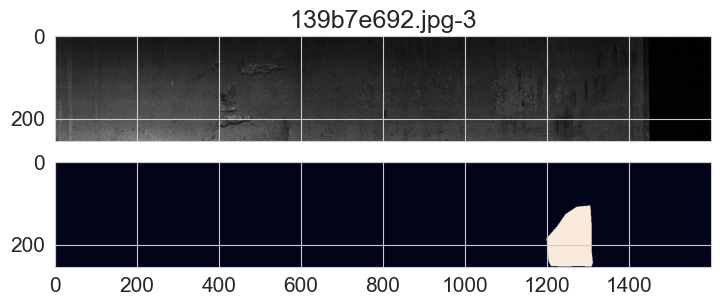

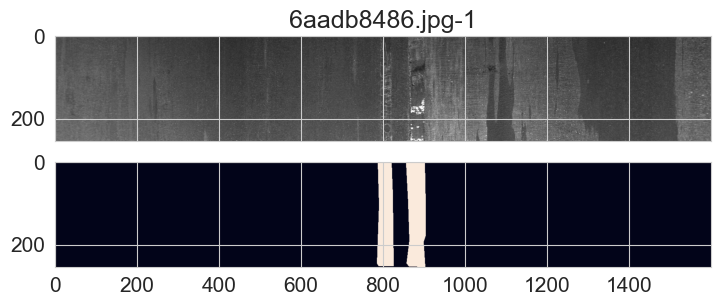

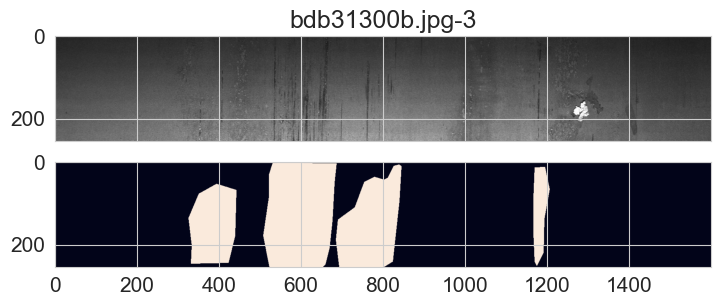

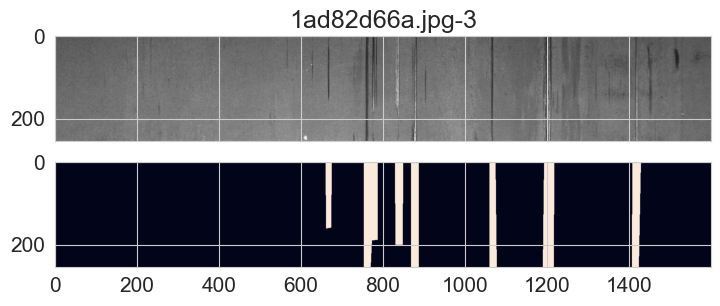

In [36]:
#let us visualize some image along with its mask
for i in range(4):
    row_id = np.random.randint(0,train_df.shape[0])
    image_id, class_id, encoded_pixel = train_df.iloc[row_id, :3]
    #read image file from path
    image = read_image(os.path.join('train_images', image_id))
    height, width, channel = image.shape
    #return mask given encoded pixel
    mask = transform(encoded_pixel, width, height)
    #plot image and corresponding mask
    fig, axs = plt.subplots(2,1,figsize=(11,3),sharex=True)
    axs[0].imshow(image)
    axs[1].imshow(mask)
    axs[0].set_title(f'{image_id}-{class_id}')
    plt.show()

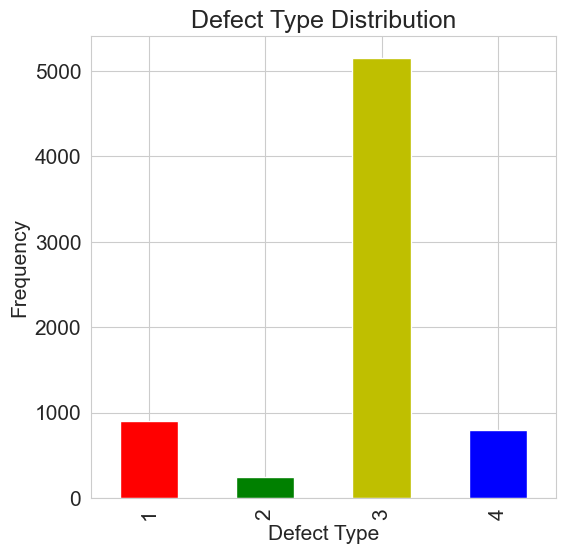

In [37]:
#Which Defect Type is more common?
#Ans: Defect Type 3 is more common followed by 1, 4 and lastly 2
train_df['ClassId'].value_counts().sort_index().plot(kind='bar', figsize=(6,6), color=['r', 'g', 'y', 'b'])
plt.xlabel('Defect Type')
plt.ylabel('Frequency')
plt.title("Defect Type Distribution")
plt.show()

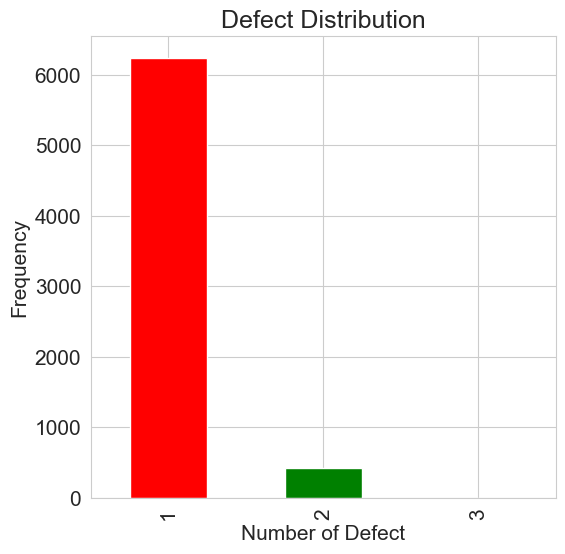

In [38]:
#How common is it to have all 4 defect type in a single sample?
#Ans: It is very unlikely to have all 4 defects in a single sample, mostly we have single defect type per sample
train_df['ImageId'].value_counts().value_counts().sort_index().plot(kind='bar', figsize=(6,6), color=['r', 'g', 'y'])
plt.xlabel('Number of Defect')
plt.ylabel('Frequency')
plt.title("Defect Distribution")
plt.show()

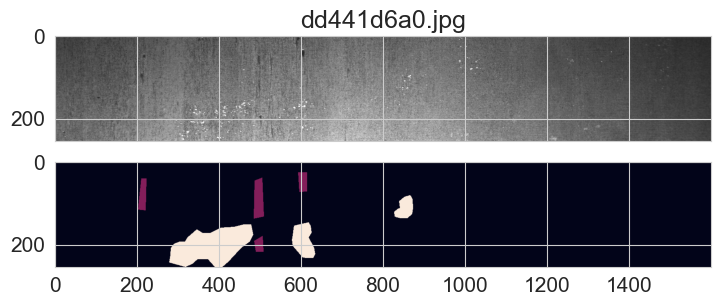

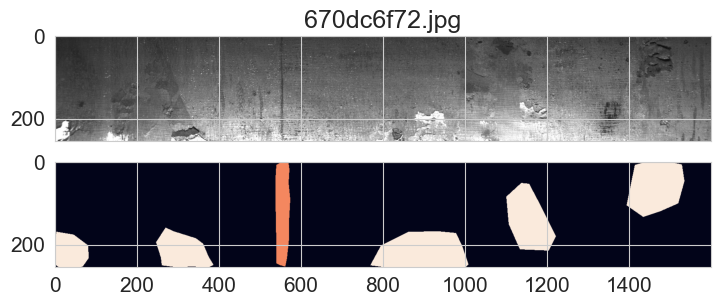

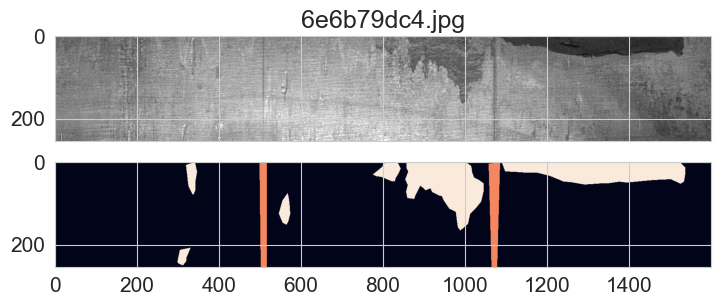

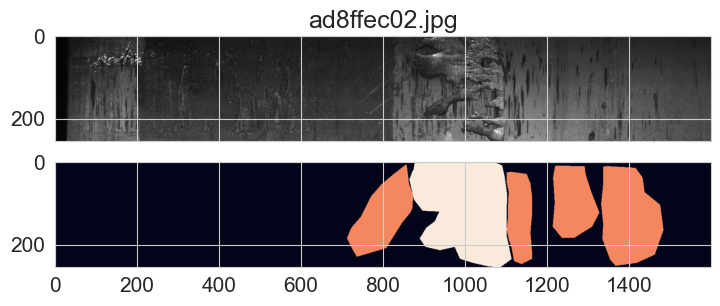

In [39]:
#let us visualize steel with multiple defects

series = train_df['ImageId'].value_counts()
image_id_with_more_than_1_defect = series[(series == 2) | (series == 3)].index

for i in range(4):
    row_id = np.random.randint(0,len(image_id_with_more_than_1_defect))
    image_id = image_id_with_more_than_1_defect[row_id]
    df = train_df[train_df['ImageId']==image_id][['ClassId', 'EncodedPixels']]
    #read image file from path
    image = read_image(os.path.join('train_images', image_id))
    height, width, channel = image.shape
    #return mask given encoded pixel
    if df.shape[0] > 1:
        mask = [transform(df['EncodedPixels'].iloc[j], width, height, df['ClassId'].iloc[j]) for j in range(df.shape[0])]
        mask = functools.reduce(lambda x, y: x+y, mask)
    else:
        mask = transform(df['EncodedPixels'], width, height, df['ClassId'])
    #plot image and corresponding mask
    fig, axs = plt.subplots(2,1,figsize=(11,3),sharex=True)
    axs[0].imshow(image)
    axs[1].imshow(mask)
    axs[0].set_title(f'{image_id}')
    plt.show()

In [40]:
#area covered by different defect types
def calculate_pixel(encoded_pixel):
    encoded_pixel_list = list(map(lambda x: int(x), encoded_pixel.split(' ')))
    n = len(encoded_pixel_list)
    sum = 0
    for i in range(1,n,2):
        sum += encoded_pixel_list[i]
    return sum/(1600*256)
train_df['defective_area'] = train_df['EncodedPixels'].apply(lambda x: calculate_pixel(x))

In [41]:
train_df.head()

,ImageId,ClassId,EncodedPixels,defective_area
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0.010732
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,0.016838
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,0.020310
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...,0.169329
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...,0.011843


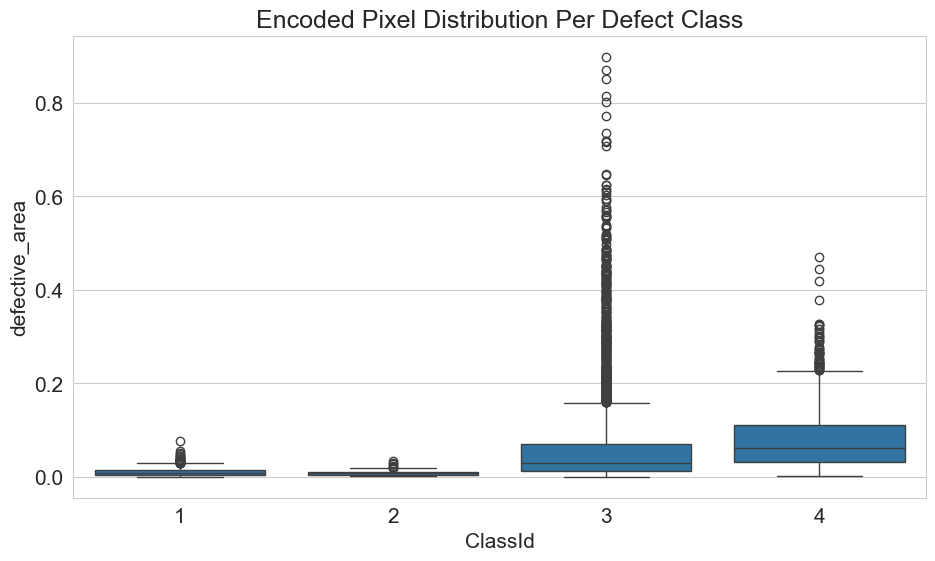

In [42]:
#which defect cover most area in an image?
#Ans: Defect 4 cover maximum pixel followed by defect 3, 1 and last 2
plt.figure(figsize=(11,6))
sns.boxplot(data=train_df, x='ClassId', y='defective_area')
plt.title('Encoded Pixel Distribution Per Defect Class')
plt.show()

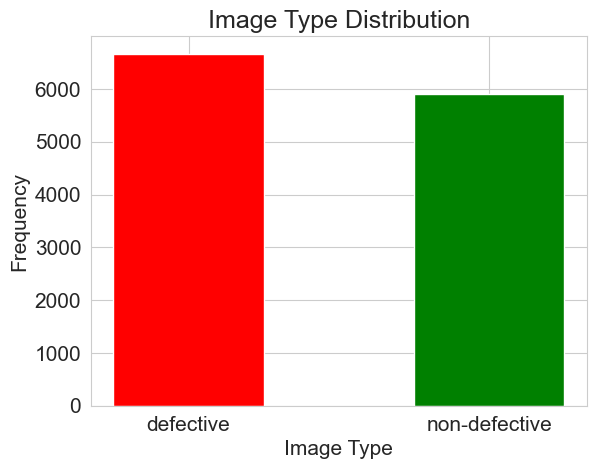

In [43]:
#What is proportion of defective to normal samples?
#Ans: We have almost equal proportion of defective to normal samples
plt.bar(x=['defective', 'non-defective'], 
        height=[train_df['ImageId'].unique().shape[0], len(train_images)-train_df['ImageId'].unique().shape[0]],
        width=0.5, color=['r', 'g'])
plt.title('Image Type Distribution')
plt.xlabel("Image Type")
plt.ylabel("Frequency")
plt.show()